In [1]:
import pandas as pd

In [17]:
train_data = pd.read_csv('data/UNSW_NB15_training-set.csv',index_col='id')

In [8]:
train_data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for col in ['proto','service','state','attack_cat']:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])

In [19]:
train_data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,117,0,4,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,6,0
2,0.000008,117,0,4,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,6,0
3,0.000005,117,0,4,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,6,0
4,0.000006,117,0,4,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,6,0
5,0.000010,117,0,4,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,6,0


In [20]:
ohe = OneHotEncoder()
dos = pd.Series(data=ohe.fit_transform(train_data[['attack_cat']]).toarray()[:,2], index=train_data.index, dtype=int)

In [21]:
train_data['dos'] = dos

In [23]:
train_data[train_data.dos == 1]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,dos
id,,,,,,,,,,,,,,,,,,,,,
247,0.921987,77,0,4,20,0,1280,0,20.607666,254,...,2,0,0,0,1,1,0,2,1,1
288,1.173262,111,0,3,16,12,2080,1746,23.012763,254,...,1,0,0,0,1,1,0,2,1,1
337,1.438237,111,5,3,10,10,958,2726,13.210619,62,...,1,0,0,1,1,1,0,2,1,1
339,1.465404,111,5,3,10,10,800,1018,12.965707,62,...,1,0,0,1,1,1,0,2,1,1
360,28.213135,77,0,4,20,0,1280,0,0.673445,254,...,1,0,0,0,1,1,0,2,1,1
361,28.213135,77,0,4,20,0,1280,0,0.673445,254,...,1,0,0,0,1,1,0,2,1,1
362,28.213135,77,0,4,20,0,1280,0,0.673445,254,...,1,0,0,0,1,1,0,2,1,1
377,0.466699,77,0,4,18,0,2858,0,36.426047,254,...,1,0,0,0,1,1,0,2,1,1
378,0.466699,77,0,4,18,0,2858,0,36.426047,254,...,1,0,0,0,1,1,0,2,1,1


In [28]:
import numpy as np
np.abs(train_data.corr()['dos']).sort_values(ascending=False)

dos                  1.000000
attack_cat           0.477123
label                0.206531
proto                0.172622
swin                 0.121462
state                0.112558
dwin                 0.112059
sttl                 0.098950
ct_srv_src           0.091860
dtcpb                0.090259
ct_srv_dst           0.089459
stcpb                0.088709
ct_dst_ltm           0.088695
ct_state_ttl         0.085918
rate                 0.073114
ct_src_dport_ltm     0.072839
ct_dst_src_ltm       0.069155
sload                0.063574
dload                0.058040
dttl                 0.057257
tcprtt               0.055620
ct_dst_sport_ltm     0.055356
synack               0.053059
dur                  0.051624
dmean                0.051482
service              0.050265
ackdat               0.048895
ct_src_ltm           0.034832
sinpkt               0.025909
dbytes               0.025423
djit                 0.024849
is_sm_ips_ports      0.024248
dpkts                0.022538
dloss     

In [29]:
from sklearn.metrics import f1_score,recall_score

In [31]:
#f1_score(y_true,y_pred)

In [32]:
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

In [34]:
algo = ['RF','GDT','LR']
accuracy = [99.2,77.1,88.2]

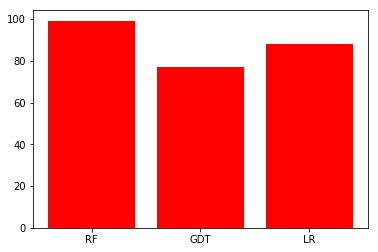

In [39]:
plt.bar([1,2,3], accuracy, color='r')
plt.xticks([1,2,3],algo)
plt.show()